In [4]:
from pymatreader import read_mat
import numpy as np
import matplotlib.pyplot as plt

In [5]:
ex4_data = read_mat('./data/ex4data1.mat')
X = np.array(ex4_data['X'])
y = np.array(ex4_data['y'])

ex4_weights = read_mat('../neural-networks/ex3weights.mat')
theta_1 = ex4_weights['Theta1']
theta_2 = ex4_weights['Theta2']
theta_1.shape, theta_2.shape

nn_params = np.hstack([theta_1.reshape((-1)), theta_2.reshape(-1)])
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

In [6]:
X[:10, :10], y[:10], X.shape, y.shape

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=uint8),
 (5000, 400),
 (5000,))

In [7]:
def print_digit(digit_data):
    plt.imshow(digit_data.reshape(20, 20).T)

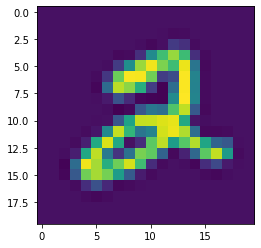

In [8]:
print_digit(X[1000])

In [9]:
labels_ = np.unique(y)
labels_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [10]:
# transform y to one hot encoding format
y = y - 1
shape = (y.size, y.max() + 1)
y_one_hot = np.zeros(shape)
rows = np.arange(y.size)
y_one_hot[rows, y] = 1
y_one_hot[0:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [11]:
# sigmoid is activation function in each layer, so i will use only one function name
sigmoid = np.vectorize(lambda z: 1 / (1 + np.exp(-z)))

In [12]:
add_bias = lambda r: np.hstack((np.ones((r.shape[0], 1)), r))

In [13]:
row = X[0]

In [14]:
def predict_proba(nn_params, input_layer_size, hidden_layer_size, num_labels, X):
    features = X.reshape(1, X.size)
    first_layer = add_bias(features)
    hidden_layer_params = nn_params[0:(input_layer_size + 1) * hidden_layer_size].reshape((hidden_layer_size, input_layer_size + 1))
    second_layer = hidden_layer_params.dot(first_layer.T).T
    second_layer = add_bias(sigmoid(second_layer))
    output_layer_params = nn_params[((input_layer_size + 1) * hidden_layer_size):].reshape((num_labels, hidden_layer_size + 1))
    output_layer = sigmoid(output_layer_params.dot(second_layer.T).T)
    return output_layer

In [15]:
predict_proba(nn_params, input_layer_size, hidden_layer_size, num_labels, row)

array([[1.12661530e-04, 1.74127856e-03, 2.52696959e-03, 1.84032321e-05,
        9.36263860e-03, 3.99270267e-03, 5.51517524e-03, 4.01468105e-04,
        6.48072305e-03, 9.95734012e-01]])

In [50]:
# neural_network_params (nn_params)
# input layer size
# hidden layer size,
# num labels
# X
# y
def cost_function(nn_params, input_layer_size, hidden_layer_size, 
                    num_labels, X, y, lambda_ = 0.):
    m = X.shape[0]
    result = 0
    for i in range(m):
        prediction_probas = predict_proba(nn_params, input_layer_size, hidden_layer_size, num_labels, X[i])[0]
        for k in range(num_labels):
            first_part = -y[i, k] * np.log(prediction_probas[k])
            second_part = (1 - y[i, k]) * np.log(1 - prediction_probas[k])
            result += first_part - second_part

    hidden_layer_params = nn_params[0:input_layer_size * hidden_layer_size]
    from_params = input_layer_size * hidden_layer_size + \
        (input_layer_size + 1) * hidden_layer_size - input_layer_size * hidden_layer_size + 1
    to_params = -((hidden_layer_size + 1) * num_labels - hidden_layer_size * num_labels) + 1
    output_layer_params = nn_params[from_params:to_params]
    lambda_suffix = lambda_ * (np.sum(np.hstack([hidden_layer_params ** 2, output_layer_params ** 2]))) / (2 * m)
    return (1. / m) * result + lambda_suffix

In [51]:
J = cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels,
                    X, y_one_hot, 0.)

(10000,) (250,)


In [42]:
# using the loaded
# set of parameters for Theta1 and Theta2. You should see that the cost is
# about 0.287629
J

0.2876291651613203

In [43]:
J = cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels,
                    X, y_one_hot, 1.)
# using the loaded
# set of parameters for Theta1 and Theta2. You should see that
# the cost is about 0.383770.
J

0.3830194148534119

# Backpropagation

In [20]:
def sigmoid_grad(z):
    return sigmoid(z) * (1 - sigmoid(z))

sigmoid_grad([1, 0])

array([0.19661193, 0.25      ])

In [21]:
# randomly initialize the weights to small values
eps_init = 0.12
W = np.random.rand(num_labels, hidden_layer_size + 1) * 2 * eps_init - eps_init

In [22]:
W.min(), W.max()

(-0.11975935748775304, 0.1196017783317048)

In [23]:
m = X.shape[0]
error_sum = 0
for i in range(m):
    # feedforward
    a0 = 

SyntaxError: invalid syntax (3301906324.py, line 5)